In [1]:
# decision tree for titanic dataset
# 실습 1 

import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score

# pip3 install sklearn

In [2]:
titanic = sns.load_dataset('titanic')        

In [3]:
# null data는 전처리과정이 필요
print(titanic.isnull().sum()) 
#print(np.isnan(titanic['age']).sum())

titanic.age.replace(np.nan,0, inplace=True)
#print(np.isnan(titanic['age']).sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [4]:
sex_to_int = {'male' : 0, "female" : 1}
titanic['sex']= titanic['sex'].map(sex_to_int)
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
data_for_train = ['pclass','sex','age','sibsp','parch', 'fare' ]
data = titanic[data_for_train]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, titanic['survived'], test_size = 0.2, random_state = 13)

In [7]:
x_train

,pclass,sex,age,sibsp,parch,fare
711,1,0,0.0,0,0,26.5500
525,3,0,40.5,0,0,7.7500
76,3,0,0.0,0,0,7.8958
626,2,0,57.0,0,0,12.3500
159,3,0,0.0,8,2,69.5500
...,...,...,...,...,...,...
742,1,1,21.0,2,2,262.3750
528,3,0,39.0,0,0,7.9250
74,3,0,32.0,0,0,56.4958
176,3,0,0.0,3,1,25.4667


In [8]:
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=13)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [9]:
print('score {}'.format(dt.score(x_train,y_train))) #train accuracy

score 0.8061797752808989


In [12]:
# 다양한 기준으로 성능을 평가할 수 있습니다.
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


y_pred = dt.predict(x_test)
print('test accuracy: {}'.format(accuracy_score(y_test,y_pred))) # test accuracy
print('test precision: {}'.format(precision_score(y_test,y_pred))) # test precision
print('test recall: {}'.format(recall_score(y_test,y_pred))) # test recall
print('test f1_measure: {}'.format(f1_score(y_test,y_pred)))

print()

# numpy 활용해서 구해보기 잠깐 문제 !! (!!)
precision = np.sum(y_test*y_pred)/np.sum(y_pred)
recall = np.sum(y_test*y_pred)/np.sum(y_test)
f1_measure = 2* (precision * recall) / (precision + recall)

print('test accuracy(numpy ver.) :', np.mean(np.equal(y_test,y_pred)))      # 정확한 의미는 
print('test precision(numpy ver.) :',precision ) # 생각이 가물가물
print('test recll(numpy ver.)', recall)       # 그럼에도 공부를 ... 
print('test f1_measure(numpy ver.): {}'.format(f1_measure))

'''
precision(정밀도) : prediction(예상)이 1일 때, 실제로 1일 확률 (살아있다고 예상했을 때, 살아 있을 확률)
recall(재현율) : 실제 1일때, prediction(예상)이 1일 확률 
f1_measure(f_measure) : precision과 recall의 조화평균  
'''

test accuracy: 0.8100558659217877
test precision: 0.8571428571428571
test recall: 0.6086956521739131
test f1_measure: 0.7118644067796609

test accuracy(numpy ver.) : 0.8100558659217877
test precision(numpy ver.) : 0.8571428571428571
test recll(numpy ver.) 0.6086956521739131
test f1_measure(numpy ver.): 0.7118644067796609


'\nprecision(정밀도) : prediction(예상)이 1일 때, 실제로 1일 확률 (살아있다고 예상했을 때, 살아 있을 확률)\nrecall(재현율) : 실제 1일때, prediction(예상)이 1일 확률 \n'

In [13]:
# test someone
# data_for_train = ['pclass','sex','age','sibsp','parch', 'fare' ]
jane = [3,1,30,0,0,5]
liam = [2,2,40,1,4,1]

pred = dt.predict([jane, liam])

print(dt.predict_proba([jane, liam]))

print(pred)    

[[0.21212121 0.78787879]
 [0.12727273 0.87272727]]
[1 1]


In [14]:
from sklearn.tree import export_graphviz
export_graphviz(
    dt,
    out_file = "titanic.dot",
    feature_names = ['pclass','sex','age','sibsp','parch', 'fare' ],
    class_names = ['unsurvived', 'survived']
)


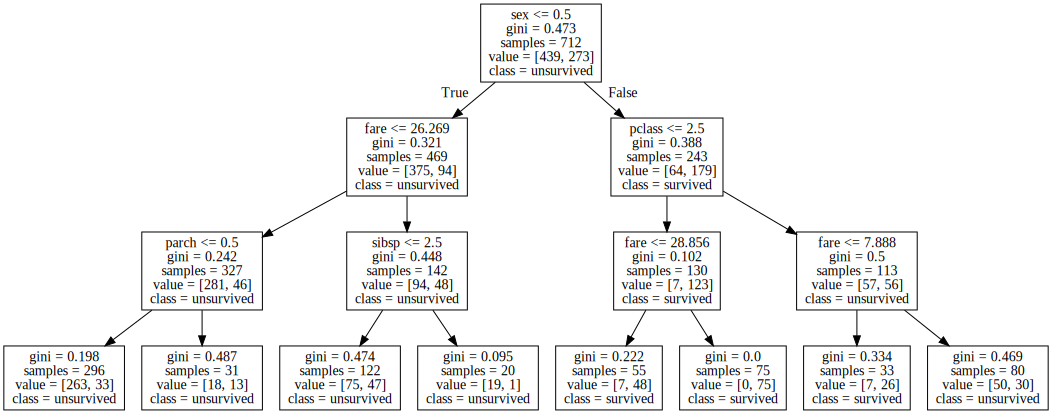

In [19]:
# 그림도 볼 수 있습니다. 

import graphviz
with open('titanic.dot') as f:
    dot_graph = f.read()
dot=graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory = './', cleanup=True)

dot
